<a name = "content"> </a>
# **Лабораторная работа №1**

## Брысов Александр
### М8О-409Б-18
----

### [1. Задание](#step1)

### [2. Необходимые функции](#step2)

### [3. Аналитическое решение](#step3)

### [4. Явная конечно-разностная схема](#step4)

### [5. Неявная конечно-разностная схема](#step5)

### [6. Схема Кранка-Николсона](#step6)

<a name = "step1"></a>
# Задание
[К началу](#content)

Используя явную и неявную конечно-разностные схемы, а также схему Кранка - Николсона, решить начально-краевую задачу для дифференциального уравнения параболического типа. Осуществить реализацию трех вариантов аппроксимации граничных условий, содержащих производные: двухточечная аппроксимация с первым порядком, трехточечная аппроксимация со вторым порядком, двухточечная аппроксимация со вторым порядком. В различные моменты времени вычислить погрешность численного решения путем сравнения результатов с приведенным в задании аналитическим решением $U(x,t)$. Исследовать зависимость погрешности от сеточных параметров $\tau, h$ .

## Вариант 1
Начально-краевая задача для дифференциального уравнения параболического типа.
$$\begin{align*} &\frac{\partial u}{\partial t} = a\frac{\partial^2 u}{\partial x^2},\\
&u(0,t) = 0,\\
&u(1,t) = 0,\\
&u(x,0) = \sin{2\pi x},\end{align*}$$


Аналитическое решение $U(x,t) = \exp(-4\pi^2 at)\sin{2\pi x}.$

<a name = "step2"></a>
# Необходимые функции

[К началу](#content)

In [ ]:
import matplotlib.patches as mpatches
import math
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

In [ ]:
def border_con_0t(x,t):
    return 0
def border_con_1t(x,t):
    return 0
def initial_con(x,t = None):
    return math.sin(2*math.pi*x)
def analytic(x,t,a):
    return math.exp(-4*(math.pi**2)*a*t)*math.sin(2*math.pi*x)

In [ ]:
def fill_initial_con(h, N, K):
    U = np.zeros([K,N])
    for j in range(N):
        U[0][j] = initial_con(j * h)
    return U

def error_norm(x,t,a,u):
    errors = []
    for i in range(len(u)):
        maximum = 0
        for j in range(len(u[0])):
            tmp = abs(u[i][j] - analytic(x[j], t[i], a))
            if maximum < tmp:
                maximum = tmp
        errors.append(maximum)
    return errors

def TMA(a, b, c, d, s):
    P = np.zeros(s)
    Q = np.zeros(s)

    P[0] = -c[0] / b[0]
    Q[0] = d[0] / b[0]

    k = s - 1

    for i in range(1, s):
        P[i] = -c[i] / (b[i] + a[i] * P[i - 1])
        Q[i] = (d[i] - a[i] * Q[i - 1]) / (b[i] + a[i] * P[i - 1])
    P[k] = 0
    Q[k] = (d[k] - a[k] * Q[k - 1]) / (b[k] + a[k] * P[k - 1])

    x = np.zeros(s)
    x[k] = Q[k]

    for i in range(s - 2, -1, -1):
        x[i] = P[i] * x[i + 1] + Q[i]
    return x

<a name = "step3"></a>
# Аналитическое решение

[К началу](#content)

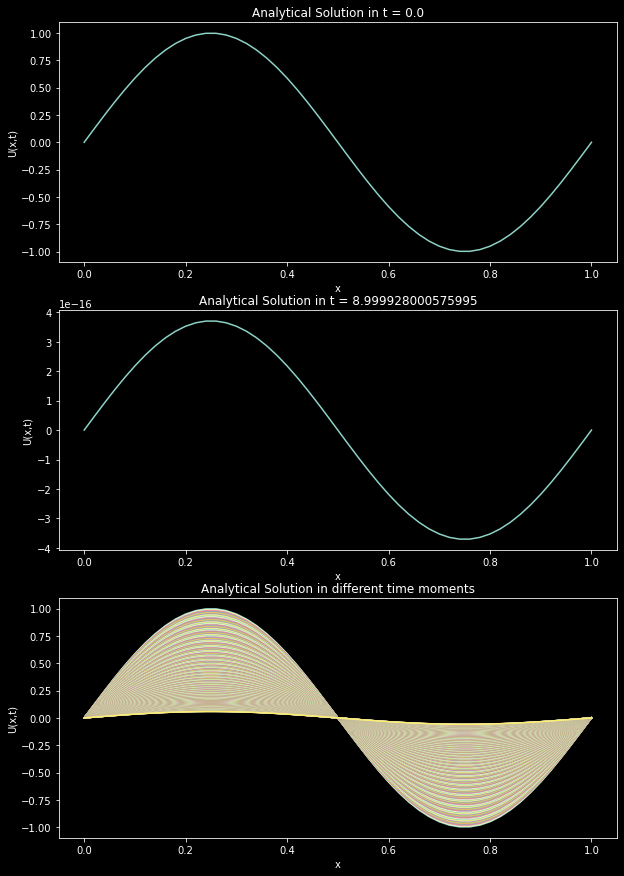

In [ ]:
N = 50
T = 50
K = 27778
a = 0.1

h = 1/N
x = np.arange(0, 1 + h, h)
tau = T/K
t = np.arange(0, T + tau, tau)
u_anlt = np.zeros((len(t),len(x)))
if a < 0:
    print("a param condition error: a < 0")
if a*tau/h**2 > 1/2:
    print("courant condition error: sigma > 1/2")
for k in range(len(t)):
    for j in range(len(x)):
        u_anlt[k][j] = analytic(j * h, k * tau, a)

fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Analytical Solution in t = {t[0]}')
plt.plot(x, u_anlt[0])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Analytical Solution in t = {t[5000]}')
plt.plot(x, u_anlt[5000])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Analytical Solution in different time moments')
for k in range(min(400, len(u_anlt))):
    plt.plot(x,u_anlt[k])

<a name = "step4"></a>
# Явная конечно-разностная схема

[К началу](#content)

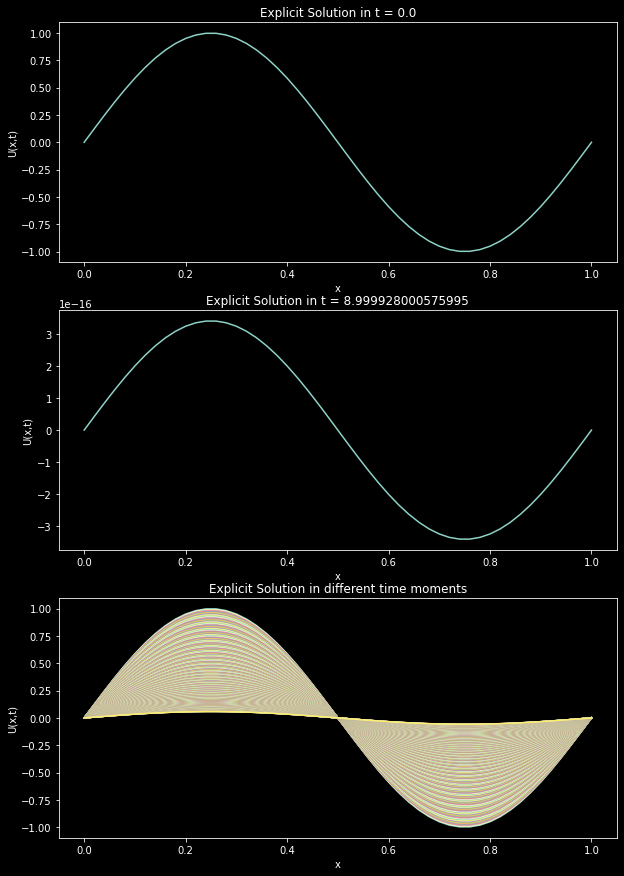

In [ ]:
def explicit():
  h = 1/N
  x = np.arange(0, 1 + h, h)
  tau = T/K
  t = np.arange(0, T + tau, tau)
  sigma = a*tau/h**2
  if sigma > 1/2:
      print("courant condition error: sigma > 1/2")
  u = fill_initial_con(h, len(x), len(t))
  for k in range(len(t)-1):
      for j in range(1, len(x)-1):
          u[k+1][j] = sigma*u[k][j+1] + (1-2*sigma)*u[k][j] + sigma*u[k][j-1]
          u[k+1][0] = border_con_0t(None,None)
          u[k+1][-1] = border_con_1t(None,None)
  return u

u_expl = explicit()
fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Explicit Solution in t = {t[0]}')
plt.plot(x, u_expl[0])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Explicit Solution in t = {t[5000]}')
plt.plot(x, u_expl[5000])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Explicit Solution in different time moments')
for k in range(min(400, len(u_expl))):
    plt.plot(x,u_expl[k])

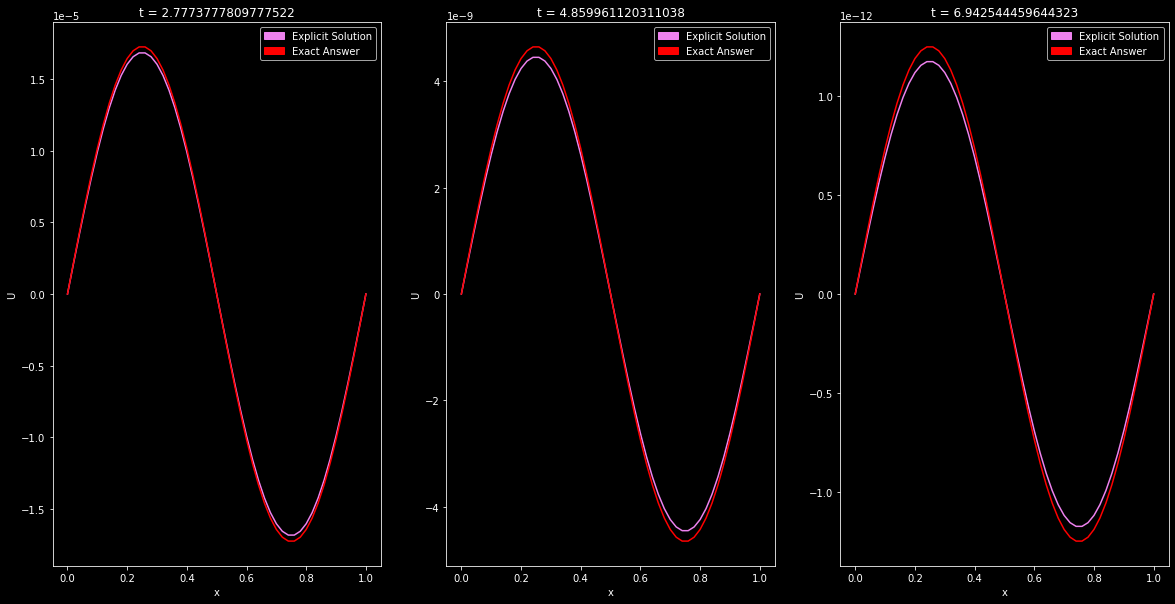

In [ ]:
fig = plt.figure(figsize=(20, 10))
k = 1
for i in range(int(len(u_expl) / 18), int(len(u_expl)/6), int(len(u_expl) / 24)):
    plt.subplot(1,3,k)
    k += 1
    plt.xlabel('x')
    plt.ylabel('U')
    plt.title(f't = {t[i]}')
    a_ = mpatches.Patch(color = 'violet', label = 'Explicit Solution')
    b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
    plt.legend(handles=[a_,b_])
    plt.plot(x, u_expl[i], color = 'violet')
    plt.plot(x,u_anlt[i], color = 'red')

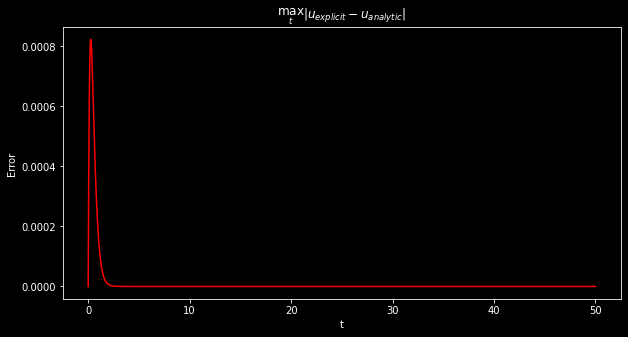

In [ ]:
er_expl = error_norm(x,t,a,u_expl)
fig = plt.figure(figsize=(10, 5))
plt.plot(t, er_expl, color = 'red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title(r'$\max_{t} \left|u_{explicit} - u_{analytic}\right|$')
plt.show()

<a name = "step5"></a>

# Неявная конечно-разностная схема

[К началу](#content)

In [ ]:
def implicit():
    N = 50
    T = 50
    K = 27778
    pde_a = 0.1

    h = 1/N
    x = np.arange(0, 1 + h, h)
    tau = T/K
    t = np.arange(0, T + tau, tau)

    N = len(t)
    M = len(x)

    U = np.zeros((N, M))
    for j in range(M):
            U[0, j] = np.sin(2*math.pi*x[j])

    sigma = pde_a / h**2
    all = np.zeros([M,M])
    for k in range(0,N-1):
        a = np.zeros(M)
        b = np.zeros(M)
        c = np.zeros(M)
        d = np.zeros(M)

        for j in range(1, M-1):
            a[j] = sigma
            b[j] = - (1/tau + 2 * sigma)
            c[j] = sigma
            d[j] = - U[k][j]/tau

        d[1] = d[1] - a[1]*border_con_0t(tau*k,pde_a)
        d[-2] = d[-2] - a[-2]*border_con_1t(tau*k,pde_a)

        a_ = [a[i] for i in range(1,len(a)-1)]
        b_ = [b[i] for i in range(1,len(b)-1)]
        c_ = [c[i] for i in range(1,len(c)-1)]
        d_ = [d[i] for i in range(1,len(d)-1)]
        Y_ = TMA(a_, b_, c_, d_, M-2)
        Y0 = border_con_0t(tau*k,pde_a)
        Ym = border_con_1t(tau*k,pde_a)
        Y = []
        Y.append(Y0)
        for y in Y_:
          Y.append(y)
        Y.append(Ym)
        
        U[k + 1] = Y

    return U

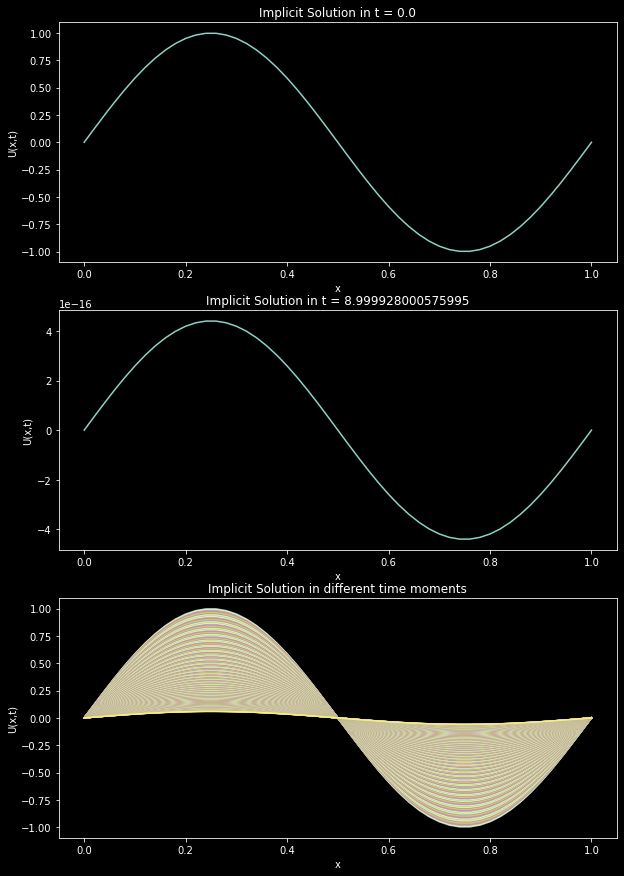

In [ ]:
u_impl = implicit()
fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Implicit Solution in t = {t[0]}')
plt.plot(x, u_impl[0])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Implicit Solution in t = {t[5000]}')
plt.plot(x, u_impl[5000])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Implicit Solution in different time moments')
for k in range(min(400, len(u_impl))):
    plt.plot(x,u_impl[k])

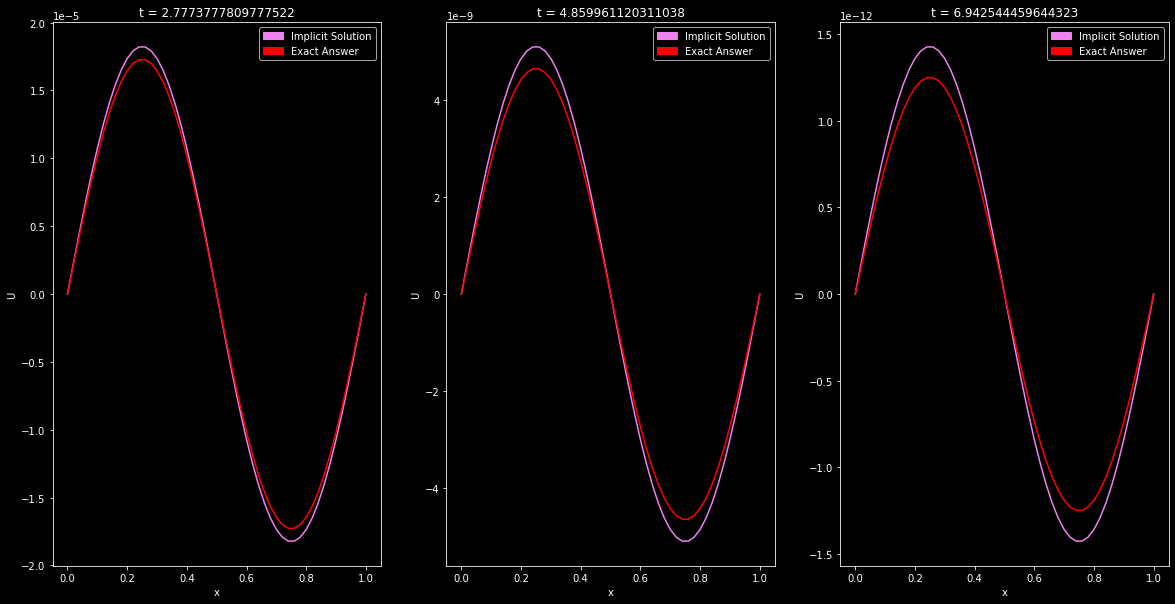

In [ ]:
fig = plt.figure(figsize=(20, 10))
k = 1
for i in range(int(len(u_impl) / 18), int(len(u_impl)/6), int(len(u_impl) / 24)):
    plt.subplot(1,3,k)
    k += 1
    plt.xlabel('x')
    plt.ylabel('U')
    plt.title(f't = {t[i]}')
    a_ = mpatches.Patch(color = 'violet', label = 'Implicit Solution')
    b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
    plt.legend(handles=[a_,b_])
    plt.plot(x, u_impl[i], color = 'violet')
    plt.plot(x,u_anlt[i], color = 'red')

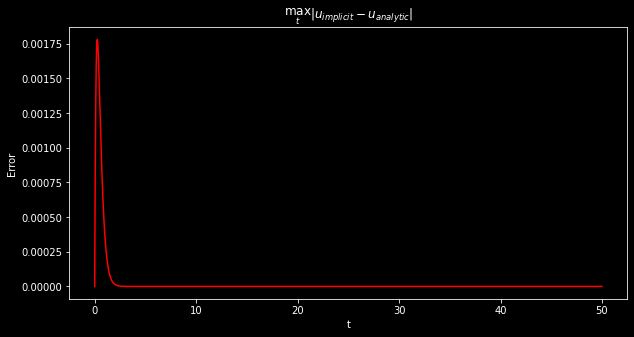

In [ ]:
er_expl = error_norm(x,t,a,u_impl)
fig = plt.figure(figsize=(10, 5))
plt.plot(t, er_expl, color = 'red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title(r'$\max_{t} \left|u_{implicit} - u_{analytic}\right|$')
plt.show()

<a name = "step6"></a>

# Схема Кранка-Николсона

[К началу](#content)

In [ ]:
def сrank_nicolson():
    N = 50
    T = 50
    K = 27778
    pde_a = 0.1

    h = 1/N
    x = np.arange(0, 1 + h, h)
    tau = T/K
    t = np.arange(0, T + tau, tau)

    N = len(t)
    M = len(x)

    U = np.zeros((N, M))
    for j in range(M):
            U[0, j] = np.sin(2*math.pi*x[j])

    sigma = pde_a / h**2
    all = np.zeros([M,M])
    for k in range(0,N-1):
        a = np.zeros(M)
        b = np.zeros(M)
        c = np.zeros(M)
        d = np.zeros(M)

        for j in range(1, M-1):
            expl = pde_a*(U[k][j+1] - 2*U[k][j] + U[k][j-1])/h**2

            a[j] = sigma/2
            b[j] = - (1/tau + sigma)
            c[j] = sigma/2
            d[j] = - U[k][j]/tau - expl/2

        d[1] = d[1] - a[1]*border_con_0t(tau*k,pde_a)
        d[-2] = d[-2] - a[-2]*border_con_1t(tau*k,pde_a)

        a_ = [a[i] for i in range(1,len(a)-1)]
        b_ = [b[i] for i in range(1,len(b)-1)]
        c_ = [c[i] for i in range(1,len(c)-1)]
        d_ = [d[i] for i in range(1,len(d)-1)]
        Y_ = TMA(a_, b_, c_, d_, M-2)
        Y0 = border_con_0t(tau*k,pde_a)
        Ym = border_con_1t(tau*k,pde_a)
        Y = []
        Y.append(Y0)
        for y in Y_:
          Y.append(y)
        Y.append(Ym)
        
        U[k + 1] = Y

    return U

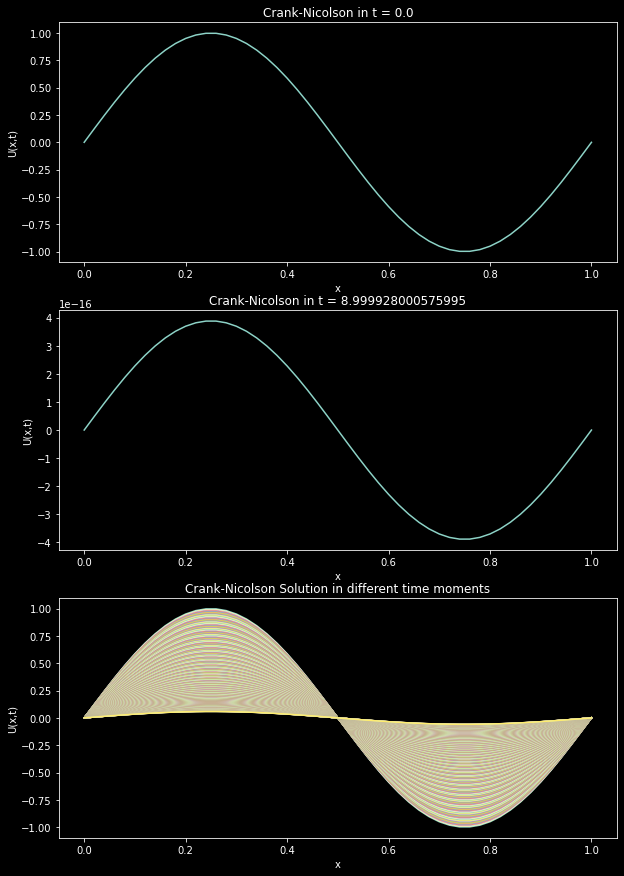

In [ ]:
u_cn = сrank_nicolson()
fig = plt.figure(figsize=(10, 15))
plt.subplot(3,1,1)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Crank-Nicolson in t = {t[0]}')
plt.plot(x, u_cn[0])
plt.subplot(3,1,2)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title(f'Crank-Nicolson in t = {t[5000]}')
plt.plot(x, u_cn[5000])
plt.subplot(3,1,3)
plt.xlabel('x')
plt.ylabel('U(x,t)')
plt.title('Crank-Nicolson Solution in different time moments')
for k in range(min(400, len(u_cn))):
    plt.plot(x,u_cn[k])

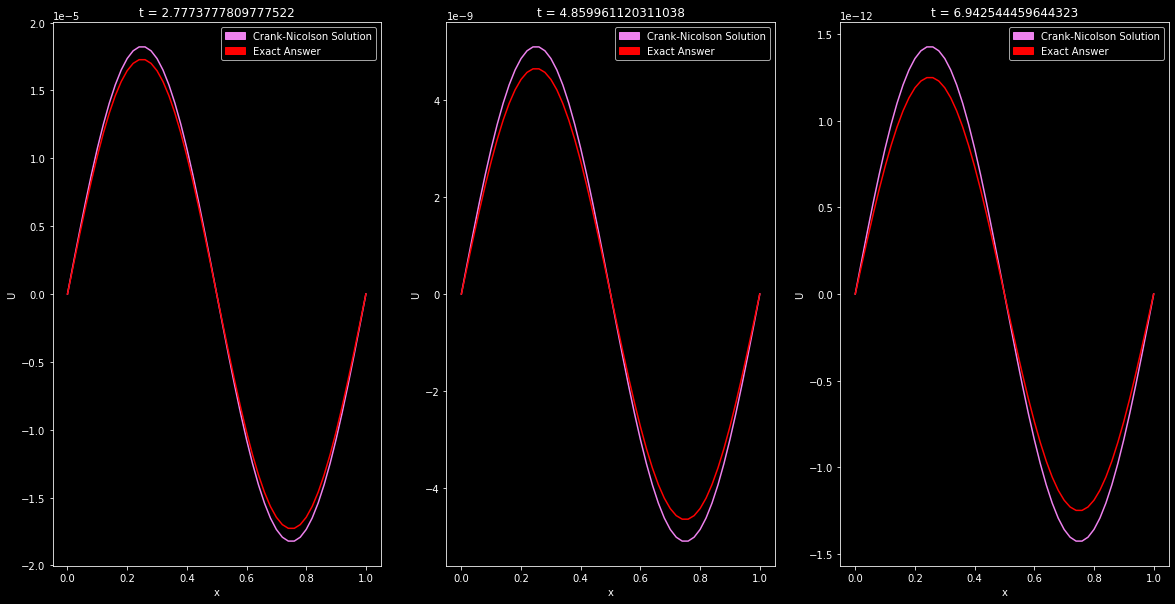

In [ ]:
fig = plt.figure(figsize=(20, 10))
k = 1
for i in range(int(len(u_cn) / 18), int(len(u_cn)/6), int(len(u_cn) / 24)):
    plt.subplot(1,3,k)
    k += 1
    plt.xlabel('x')
    plt.ylabel('U')
    plt.title(f't = {t[i]}')
    a_ = mpatches.Patch(color = 'violet', label = 'Crank-Nicolson Solution')
    b_ = mpatches.Patch(color = 'red', label = 'Exact Answer')
    plt.legend(handles=[a_,b_])
    plt.plot(x, u_impl[i], color = 'violet')
    plt.plot(x,u_anlt[i], color = 'red')

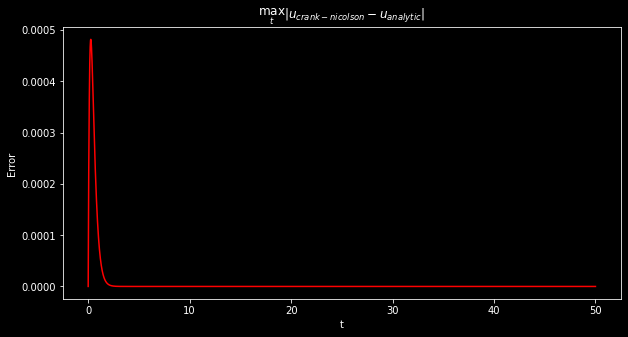

In [ ]:
er_expl = error_norm(x,t,a,u_cn)
fig = plt.figure(figsize=(10, 5))
plt.plot(t, er_expl, color = 'red')
plt.xlabel('t')
plt.ylabel('Error')
plt.title(r'$\max_{t} \left|u_{сrank-nicolson} - u_{analytic}\right|$')
plt.show()